# PROJECT 2

## Introduction


The data I obtained includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The data was obtained through the dataset sources ideas on Blackboard UMBC (UCI Machine Learning Repository).
The data set is available free of cost and there are no legal issues. The raw data has 23 columns and 8124 rows (including header). The size of the file is 0.374MB.

Link to Dataset: <a href="https://archive.ics.uci.edu/ml/datasets/mushroom">Mushroom Dataset</a>

### Importing the Packages

In [1]:
from platform import python_version           #importing packages 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
palette = sns.color_palette("pastel")         # Setting the palette

### Version Control

In [2]:
# version control
print(f'Python Version is: {python_version()}')
print(f'Matplotlib Version is: {matplotlib.__version__}')
print(f'Pandas Version is: {pd.__version__}')
print(f'Numpy Version is: {np.__version__}')
print(f'Seaborn Version is: {sns.__version__}')

Python Version is: 3.10.5
Matplotlib Version is: 3.6.1
Pandas Version is: 1.4.4
Numpy Version is: 1.23.3
Seaborn Version is: 0.12.0


###  DATA WRANGLING
In this section we would:
1. Collect Data
2. Inspect the Data
3. Cleanup the data

#### 1. COLLECT DATA

In [3]:
df = pd.read_csv('mushrooms.csv')              #loading the csv file
df.head()                                    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### 2. INSPECT THE DATA

In [4]:
df.info()                                  #getting the info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.shape                  

(8124, 23)

In [7]:
magma_palette = sns.color_palette("magma")

def hide_spines(ax, spines=["top", "right", "left", "bottom"]):
    for spine in spines:
        ax.spines[spine].set_visible(False)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 22


C:\Users\Admin\AppData\Local\Temp\ipykernel_16924\137469751.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


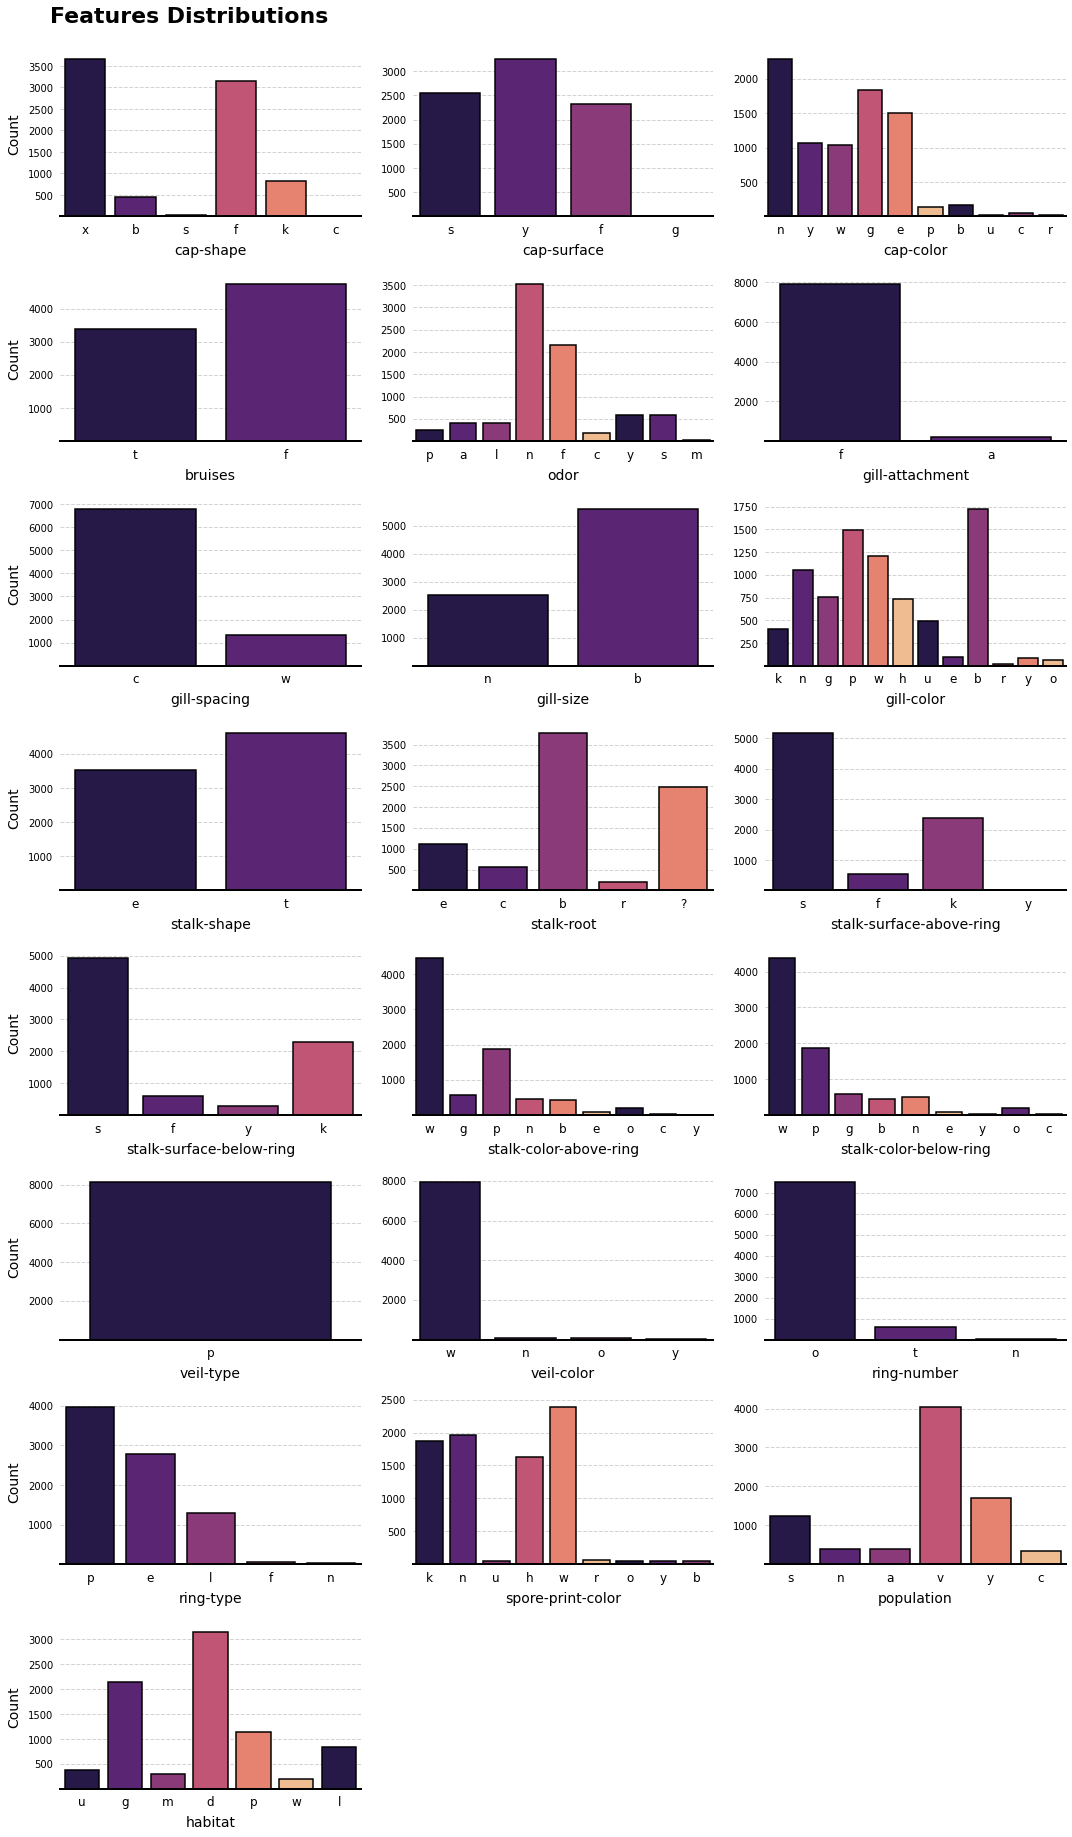

In [8]:
#Plotting graph to show various attributes of the dataset
features = df.columns[1:].tolist()
print(features, len(features))

rows = 8
cols = 3
fig = plt.figure(figsize=(15, 25))
fig.set_facecolor("#fff")
for idx, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    sns.countplot(x=feature, palette=magma_palette, data=df, ec="#000", alpha=1, linewidth=1.5, zorder=2)
    ax.xaxis.set_tick_params(size=0, labelsize=12, pad=7)
    ax.yaxis.set_tick_params(size=0, labelsize=10, pad=7)
    
    if idx % cols == 0:
        ax.set_ylabel("Count", fontsize=14, labelpad=7)
    else:
        ax.set_ylabel("")
        
    ax.set_xlabel(feature, fontsize=14, labelpad=7)
    hide_spines(ax, spines=["top", "right", "left"])
    ax.spines["bottom"].set(linewidth=2)
    ax.set_ylim(1)

fig.text(x=0.05, y=1.01, s="Features Distributions", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

#### 3. CLEANUP THE DATA

The values for some attributes are found to be unreadable during analysis. So, to make visualizations more understandable, the attribute values are changed to more understandable format.

In [9]:
# We use  the replace function of the dataframe in order to replace one worded values to descriptive values
# For this we define a dictionary for every attribute with key value pairs as 'old-value':'new-value'.
# Then we pass this into the replace function.

cap_shape={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
df["cap-shape"]=df["cap-shape"].replace(cap_shape)

cap_surface={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
df["cap-surface"]=df["cap-surface"].replace(cap_surface)

cap_color={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["cap-color"]=df["cap-color"].replace(cap_color)

odor={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
df["odor"]=df["odor"].replace(odor)

gill_attachment={"a":"attached","f":"free", "d":"descending", "n":"notched"}
df["gill-attachment"]=df["gill-attachment"].replace(gill_attachment)

gill_spacing={"c":"close","w":"crowded", "d":"distant"}
df["gill-spacing"]=df["gill-spacing"].replace(gill_spacing)

gill_size={"b":"broad","n":"narrow"}
df["gill-size"]=df["gill-size"].replace(gill_size)

gill_color={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["gill-color"]=df["gill-color"].replace(gill_color)

stalk_shape={"t":"tapering","e":"enlarging"}
df["stalk-shape"]=df["stalk-shape"].replace(stalk_shape)

stalk_root={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
df["stalk-root"]=df["stalk-root"].replace(stalk_root)

stalk_surface_above_ring={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(stalk_surface_above_ring)
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(stalk_surface_above_ring)

stalk_color_above_ring={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(stalk_color_above_ring)
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(stalk_color_above_ring)

veil_type={"p":"partial","u":"universal"} 
df["veil-type"]=df["veil-type"].replace(veil_type)

veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
df["veil-color"]=df["veil-color"].replace(veil_color)

ring_number= {"n":"none","o":"one","t":"two"}
df["ring-number"]=df["ring-number"].replace(ring_number)

ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
df["ring-type"]=df["ring-type"].replace(ring_type)

spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
df["spore-print-color"]=df["spore-print-color"].replace(spore_print_color)

population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
df["population"]=df["population"].replace(population)

habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
df["habitat"]=df["habitat"].replace(habitat)

bruises={"t":"bruises","f":"no"}
df["bruises"]=df["bruises"].replace(bruises)

target_class={"e":"edible","p":"poisonous"}
df["class"]=df["class"].replace(target_class)

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


##### CHECK FOR NULL VALUES

In [11]:
df.isnull().sum()                           #checking if there are any null values in dataset

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot: xlabel='class', ylabel='count'>

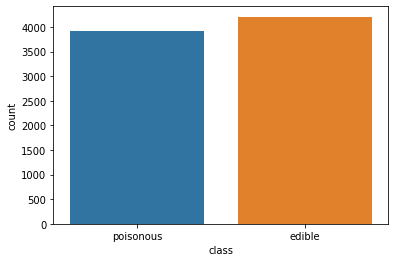

In [12]:
sns.countplot(df, x='class')                    #plotting graph of edible and poisonous mushrooms using seaborn

<Figure size 1008x432 with 0 Axes>

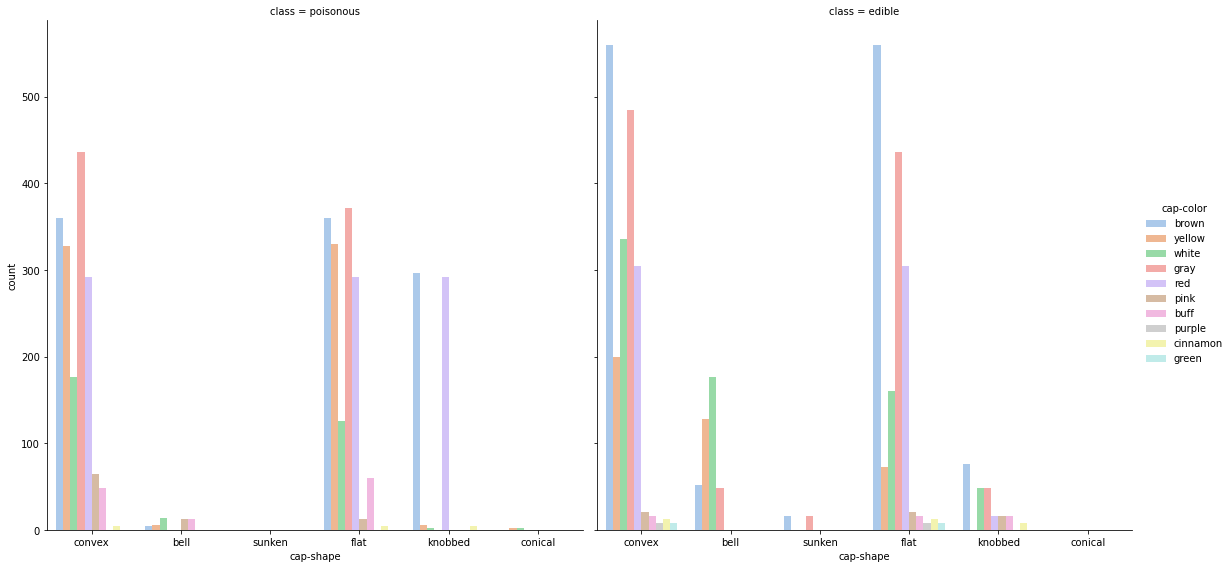

In [13]:
#graph of different cap-shape and color of mushrooms count
plt.figure(figsize = (14,6))            # Set up the graph figure size
g = sns.catplot(x="cap-shape", hue="cap-color", col="class", data=df, kind="count", palette='pastel', height=8, aspect=1)

<AxesSubplot: >

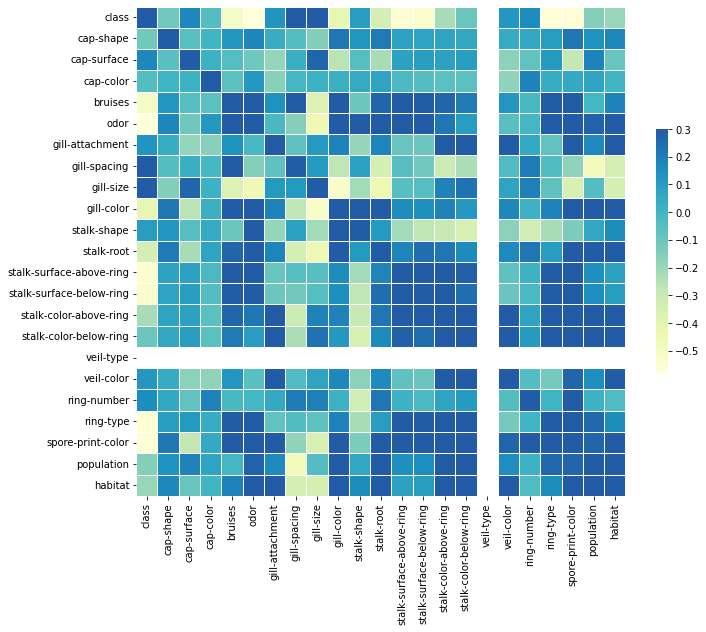

In [14]:
corr_matrix = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1) #Reference: https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generating a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap='YlGnBu',  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Hypothesis Testing

### 1. Is there a relationship between bright colours and mushroom being poisonous? 
There is a general assumption that we should always avoid brightly colored entities in the wild - animals, insects, and even mushrooms. Here we test this asumption for the mushrooms.

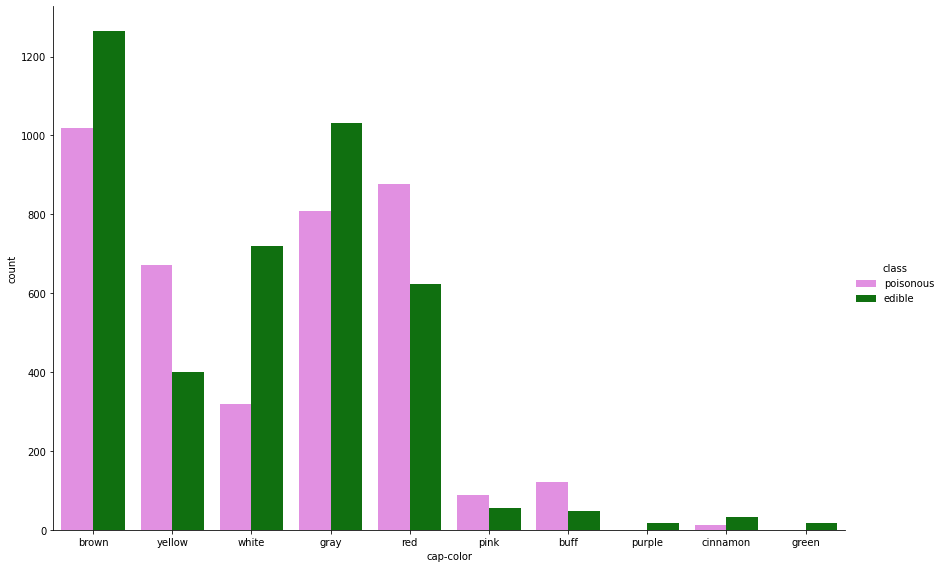

In [15]:
palette = {'poisonous': 'violet', 'edible':'green'}      #Setting the palette
g = sns.catplot(x="cap-color", hue="class", data=df, kind="count", palette=palette, height=8, aspect=1.5, orient='v')   #Plotting the graph

### Hypothesis 1 Result
<b>Hypothesis Failed </b><br><br> As visible from the graph plot, for almost all of the colors, bright or otherwise, there is a nearly a 50-50 split between edible and poisonous examples. Hence, our assumption that brightly colored mushrooms are poisonous fails.<br>
However, there is an interesting observation that purple and green colored mushrooms (at least for this dataset) are all edible.

### 2. Is habitat indicative of the mushroom being poisonous or not?
Usually we make the assumption that food from dirty environment will absorb the toxins in the surroundings and become inedible. Let us test this hypothesis.

woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: habitat, dtype: int64


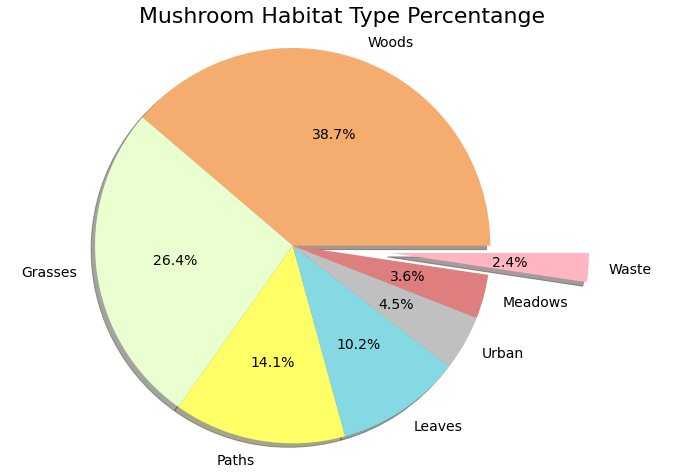

In [16]:
#Plotting habitat types and its values.

habitats = df['habitat'].value_counts()
hab_size = habitats.values.tolist() #Provides numerical values
hab_types = habitats.axes[0].tolist() #Converts index labels object to list
print(habitats)
# Data to plot
hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0, 0.5)  # exploding 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Habitat Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

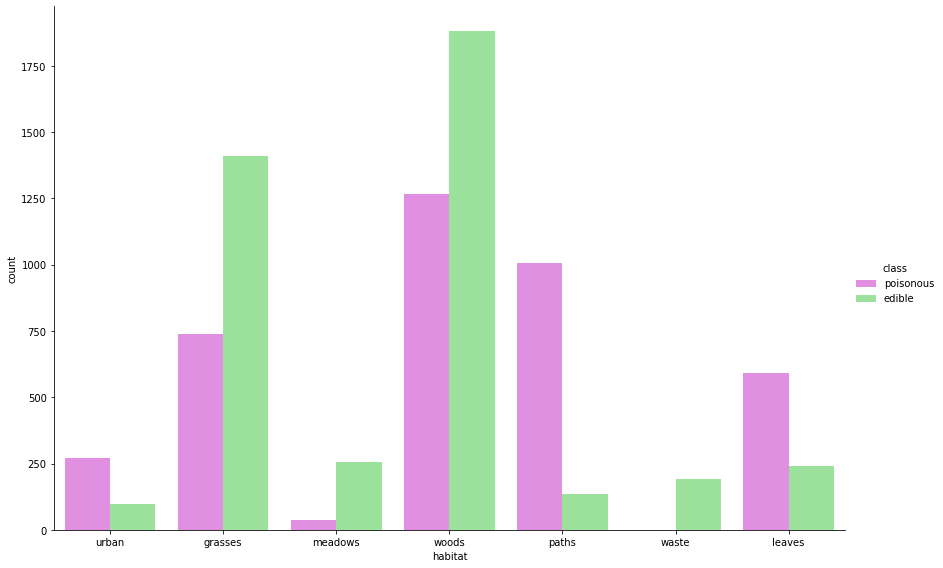

In [17]:
palette = {'poisonous': 'violet', 'edible':'lightgreen'}            #Setting the palette
g = sns.catplot(x="habitat", hue="class", data=df, kind="count", palette=palette, height=8, aspect=1.5)  #Plotting the graph

### Hypothesis 2 Result
<b>Hypothesis Failed </b><br><br> As visible from the graph plot, for almost all of the habitat types, there is a an inconclusive split between edible and poisonous examples. Even for large gaps, we cannot safely assume that a mushrooms from a habitat will be all poisonous or edible. Hence, our assumption that habitat indicates wether a mushroom is poisonous or edible fails.<br>
However, there is an interesting observation in this graph too, that mushrooms growing in waste (at least for this dataset) are 100% edible, which is opposite for our hypothesis.

### 3. Is odor indicative of the mushroom being poisonous or not?
Usually we assume that objects with a bad smell are inedible. Let us test wether this assumption is true or not.

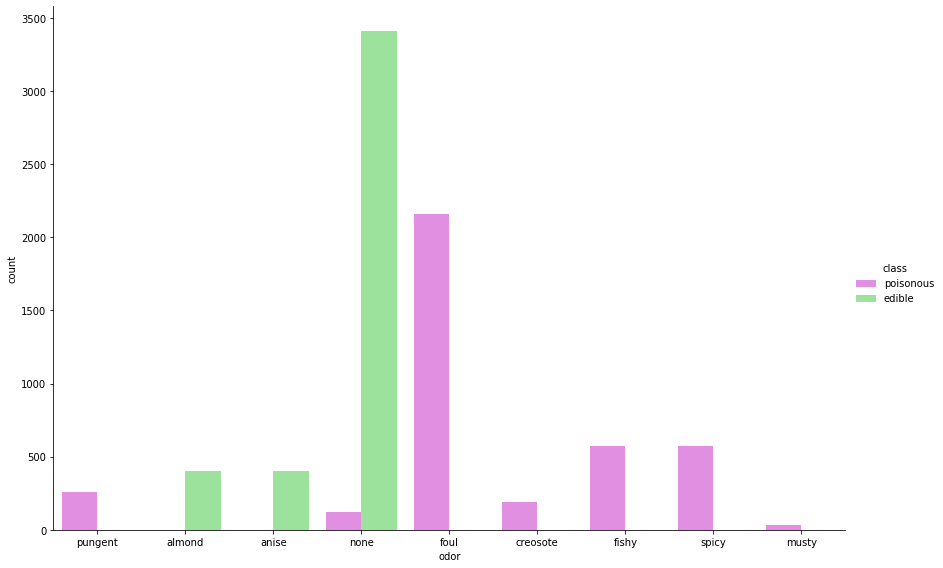

In [18]:
palette = {'poisonous': 'violet', 'edible':'lightgreen'}    #Setting the palette
g = sns.catplot(x="odor", hue="class", data=df, kind="count", palette=palette, height=8, aspect=1.5) #Plotting the graph

### Hypothesis 3 Result
<b>Hypothesis is True </b><br><br> We see that mushrooms with odors - foul, fishy, musty, pungent, creosote, spicy - are all poisonous, while those with almond and anise odor are edible. The only exception are those with no odor - almost all of the mushrooms with no odor are edible, but some are poisonous (relatively small amount).<br>
Hence, we can safely assume that odor of the mushroom is indicative of the mushroom being poisonous or edible.

<h2><center><b>Thank You</b></center>